# 7569 토마토
다른 블로그 참조 : X

### Q)
철수의 토마토 농장에서는 토마토를 보관하는 큰 창고를 가지고 있다. 토마토는 아래의 그림과 같이 격자모양 상자의 칸에 하나씩 넣은 다음, 상자들을 수직으로 쌓아 올려서 창고에 보관한다.

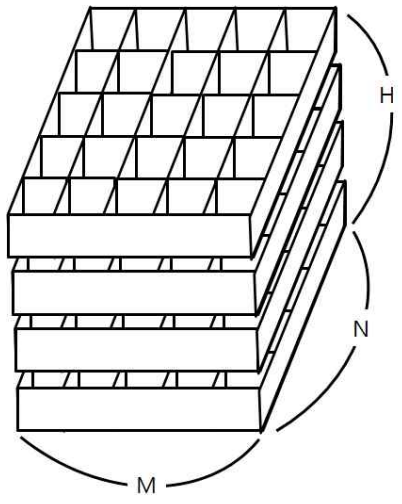

창고에 보관되는 토마토들 중에는 잘 익은 것도 있지만, 아직 익지 않은 토마토들도 있을 수 있다. 보관 후 하루가 지나면, 익은 토마토들의 인접한 곳에 있는 익지 않은 토마토들은 익은 토마토의 영향을 받아 익게 된다. 하나의 토마토에 인접한 곳은 위, 아래, 왼쪽, 오른쪽, 앞, 뒤 여섯 방향에 있는 토마토를 의미한다. 대각선 방향에 있는 토마토들에게는 영향을 주지 못하며, 토마토가 혼자 저절로 익는 경우는 없다고 가정한다. 철수는 창고에 보관된 토마토들이 며칠이 지나면 다 익게 되는지 그 최소 일수를 알고 싶어 한다.

토마토를 창고에 보관하는 격자모양의 상자들의 크기와 익은 토마토들과 익지 않은 토마토들의 정보가 주어졌을 때, 며칠이 지나면 토마토들이 모두 익는지, 그 최소 일수를 구하는 프로그램을 작성하라. 단, 상자의 일부 칸에는 토마토가 들어있지 않을 수도 있다.

### Input)
첫 줄에는 상자의 크기를 나타내는 두 정수 M,N과 쌓아올려지는 상자의 수를 나타내는 H가 주어진다. M은 상자의 가로 칸의 수, N은 상자의 세로 칸의 수를 나타낸다. 단, 2 ≤ M ≤ 100, 2 ≤ N ≤ 100, 1 ≤ H ≤ 100 이다. 둘째 줄부터는 가장 밑의 상자부터 가장 위의 상자까지에 저장된 토마토들의 정보가 주어진다. 즉, 둘째 줄부터 N개의 줄에는 하나의 상자에 담긴 토마토의 정보가 주어진다. 각 줄에는 상자 가로줄에 들어있는 토마토들의 상태가 M개의 정수로 주어진다. 정수 1은 익은 토마토, 정수 0 은 익지 않은 토마토, 정수 -1은 토마토가 들어있지 않은 칸을 나타낸다. 이러한 N개의 줄이 H번 반복하여 주어진다.

토마토가 하나 이상 있는 경우만 입력으로 주어진다.

### Output)
여러분은 토마토가 모두 익을 때까지 최소 며칠이 걸리는지를 계산해서 출력해야 한다. 만약, 저장될 때부터 모든 토마토가 익어있는 상태이면 0을 출력해야 하고, 토마토가 모두 익지는 못하는 상황이면 -1을 출력해야 한다.



### Source Code)

In [ ]:
from sys import stdin
from collections import deque
input = stdin.readline

M, N, H = map(int, input().split())
tomato = []
queue = deque([])

for _ in range(H):
    tomato_box = []
    for _ in range(N):
        tomato_box.append(list(map(int, input().split())))
    tomato.append(tomato_box)

for i in range(H):
    for j in range(N):
        for k in range(M):
            if tomato[i][j][k] == 1:
                queue.append((i, j, k))

dx = [1, -1, 0, 0, 0, 0]
dy = [0, 0, 1, -1, 0, 0]
dz = [0, 0, 0, 0, 1, -1] # 1

def BFS():
    while queue:
        z, x, y = queue.popleft()
        for i in range(6):
            now_x = x + dx[i]
            now_y = y + dy[i]
            now_z = z + dz[i]
            if 0 <= now_x < N and 0 <= now_y < M and 0 <= now_z < H and tomato[now_z][now_x][now_y] == 0:
                tomato[now_z][now_x][now_y] = tomato[z][x][y] + 1
                queue.append((now_z, now_x, now_y))

BFS()
res = 0

for i in tomato:
    for j in i:
        for k in j:
            if k == 0:
                print(-1)
                exit(0)
        res = max(res, max(j))

print(res - 1)

7576번 토마토 문제와 다르게 층이 나누어져 있다.

하지만 당황할 필요 없이 원래는 dx, dy만 고려했던 것을 이젠 dx, dy, dz에 대해서 고려해주기만 하면 된다. (# 1)

주의해야할 점은 M, N, H의 순서만 고려하면 된다.

reference : 

https://github.com/Ha-coding-user/BaekJoon_practice/blob/main/graph/7576.ipynb